<a href="https://colab.research.google.com/github/EnriqueGRivas/Analisis_Bluex/blob/main/PP1/2_1_EDA_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=black size = 6 face="Verdana"><center><strong>SUPPLY CHAIN ANALYTICS - Gestión Moderna de la Cadena de Suministros</center></font>


  <font color=black><center>Fecha: 02-09-2024</center>


  <font color=#48c9b0><center>Elaborado por: Mg. Ec. Enrique F. Gutierrez Rivasplata</center>

<center> <h1 style="background-color:seagreen; color:white" ><Strong>Exploring Data Analysis (EDA)</h1>

### **Importando Paquetes:**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import datetime
import scipy
import scipy.stats as stats
from datetime import datetime

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import seaborn as sns
import os
from matplotlib import pyplot as plt

<a id='part1'></a>
## <font color=#ba4a00><strong>Lectura y Comprensión de los Datos:

In [ ]:
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer el archivo Excel con los datos simulados
# ==============================================================================
data = pd.read_excel('/content/drive/MyDrive/Análisis - Python/DATOS/Data1.xlsx')


# Copiamos el dataframe
# ==============================================================================
df = data.copy()

# Mostrar las primeras filas del dataframe
# ==============================================================================
df.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_por_Distribucion_SDD,Ingresos_por_Falsos_Fletes,Ingreso_Picking,Ingreso_Posicion_Rack,Ingreso_Shipping,Slotting_Recepcion_Prom,Total_Ingresos_Almacen,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica
0,2015-01-03,2204383,3111,204978,Shipping,Standard Class,CON-10004331147,2015-01-03,2015-01-03,80,...,66603.25,0.0,349.650000,164.365385,223.8,291.375000,560.635385,66603.25,528.600,67692.485385
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,3379.95,0.0,413.696970,194.472935,49.0,344.747475,663.329501,3379.95,70.425,4113.704501
2,2015-01-03,2204387,3115,204754,Shipping,Standard Class,CON-10004331147,2015-01-05,2015-01-05,22,...,66150.00,0.0,8.910000,4.188462,11.8,7.425000,14.286462,66150.00,4488.750,70653.036462
3,2015-01-03,2204382,3110,1001830,Shipping,Standard Class,CON-10181604579,2015-01-05,2015-01-06,90,...,0.00,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,21752.75,32387.400,54360.743328
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,30453.85,32387.4,137.576863,64.672884,19.2,114.647385,220.593328,30453.85,32387.400,63061.843328


In [ ]:
# Mostramos el número de filas y columnas
# ==============================================================================
print("La cantidad de columnas es: ",df.shape[1])
print("La cantidad de filas es: ",df.shape[0])

La cantidad de columnas es:  81
La cantidad de filas es:  26162


In [ ]:
# Identificamos la cantidad de NANs en cada función y seleccione solo aquellas que tienen NANs
# ==============================================================================
total_NA = df.isnull().sum()[df.isnull().sum() != 0]

# Calculamos el porcentaje de NANs en cada característica
# ==============================================================================
percent_NA = df.isnull().sum()[df.isnull().sum() != 0]/df.shape[0]

# Resumen de nuestros hallazgos en un Data Frame
# ==============================================================================
missing = pd.concat([total_NA, percent_NA], axis=1, keys=['Total NANs', 'Porcentaje']).sort_values('Total NANs', ascending=False)
missing

,Total NANs,Porcentaje
Proceso_Devol,21535,0.82314
Cod_Cliente_Devol,21535,0.82314


Basándonos en el conjuntos de datos, podría responder algunas preguntas:

1. ¿Cuál es el valor promedio por pedido en términos de ventas, descuentos y devoluciones para cada mes?
2. ¿Qué tipos de productos aportan el 80% de las ventas?
3. ¿Cuál es el volumen típico por pedido por tipo de producto?
4. ¿Cuál es el rango de descuentos y devoluciones para cada tipo de producto?
5. ¿Existe una relación entre la tasa de descuento y la tasa de devolución?

6. Sin el ID del pedido, no podría identificar qué tipo de producto se pide normalmente con otro tipo de producto. Esto podría ayudar al vendedor a identificar qué paquete de productos podría crearse para las ventas.
7. Sin una marca de tiempo, no podría identificar si existe una tendencia en el perfil de producto mensual.
8. Sin una marca de tiempo, no es posible identificar las ventas esperadas para el año 2020 (si no hay coronavirus) y qué nivel de inventario se debe mantener para cada mes.

## **1. ¿Cuál es el valor promedio por pedido en términos de ventas, descuentos y devoluciones para cada mes?**

In [ ]:
# Creación de Variables
# ==============================================================================
df['Total_Orders'] = df.groupby('#Orden')['#Orden'].transform('count')

df["Ventas_brutas_prom_pedidos"] = df["Ganancia"]/df["Total_Orders"]
df["Ventas_totales_prom_pedidos"] = df["Venta_Totales"]/df["Total_Orders"]
df["Descuentos_prom_pedidos"] = df["Descuento"]/df["Total_Orders"]
df["Devoluciones_prom_pedidos"] = df["%Devolucion"]/df["Total_Orders"]
df["Envio_prom_pedido"] = df[df['Proceso']=="Shipping"].shape[0]/df["Total_Orders"]
df["Prom_devoluciones_y_descuentos_pedidos"] = (df["Devolucion_Total"] + df["Descuento_Total"])/df["Total_Orders"]
df.head()

,F_Orden,#Orden,Factura,Cod_Prod,Proceso,Tipo_Envio,Cod_Cliente,F_Vencimiento,F_Envio,Cant_Solicitada,...,Ingresos_Distribucion,Ingresos_Cancelaciones_Totales,Total_Ingresos_Gestion_Logistica,Total_Orders,Ventas_brutas_prom_pedidos,Ventas_totales_prom_pedidos,Descuentos_prom_pedidos,Devoluciones_prom_pedidos,Envio_prom_pedido,Prom_devoluciones_y_descuentos_pedidos
0,2015-01-03,2204383,3111,204978,Shipping,Standard Class,CON-10004331147,2015-01-03,2015-01-03,80,...,66603.25,528.600,67692.485385,1,634.320,1902.950,0.4,0.002497,26162.0,972.62
1,2015-01-03,2204384,3112,1097514,Shipping,Standard Class,EMP-20449216343,2015-01-05,2015-01-05,27,...,3379.95,70.425,4113.704501,2,16.095,48.285,0.1,0.001092,13081.0,23.74
2,2015-01-03,2204387,3115,204754,Shipping,Standard Class,CON-10004331147,2015-01-05,2015-01-05,22,...,66150.00,4488.750,70653.036462,1,1352.880,1890.000,0.8,0.005930,26162.0,3307.50
3,2015-01-03,2204382,3110,1001830,Shipping,Standard Class,CON-10181604579,2015-01-05,2015-01-06,90,...,21752.75,32387.400,54360.743328,1,290.030,870.110,0.0,0.020913,26162.0,719.72
4,2015-01-05,2204395,3123,1001830,Shipping,Standard Class,EMP-20447989051,2015-01-06,2015-01-06,81,...,30453.85,32387.400,63061.843328,1,290.030,870.110,0.0,0.020913,26162.0,719.72


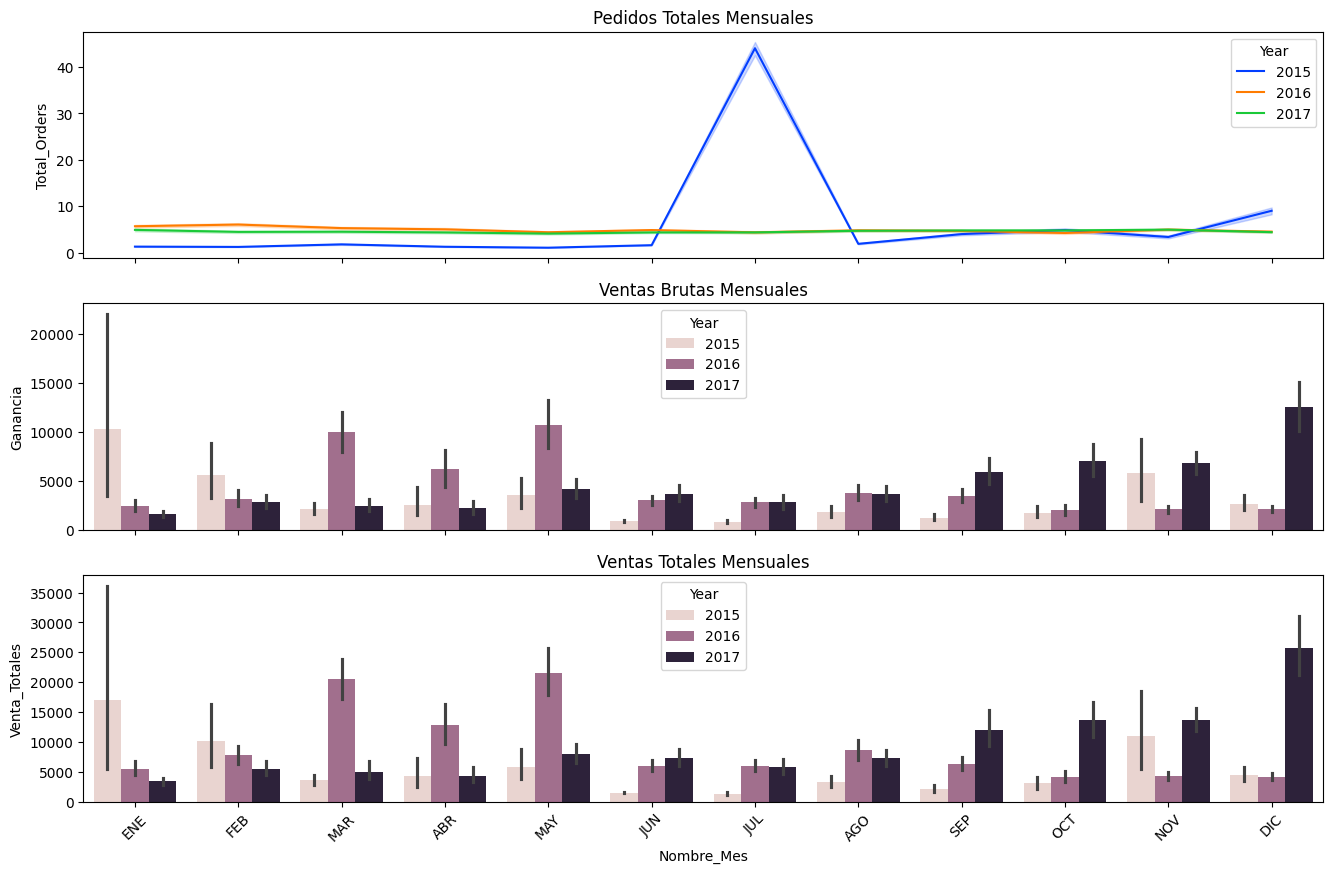

In [ ]:
# Graficando
# ==============================================================================
fig, ax = plt.subplots(3,1, figsize = (16,10), sharex = "all")
sns.lineplot(x = "Nombre_Mes", y = "Total_Orders", data = df, hue = "Year", ax = ax[0], palette = "bright", sort = False)
ax[0].set_title("Pedidos Totales Mensuales")

sns.barplot(x = "Nombre_Mes", y = "Ganancia", data = df, hue = "Year", ax = ax[1])
ax[1].set_title("Ventas Brutas Mensuales")

sns.barplot(x = "Nombre_Mes", y = "Venta_Totales", data = df, hue = "Year", ax = ax[2])
ax[2].set_title("Ventas Totales Mensuales")
plt.xticks(rotation=45)
plt.show()

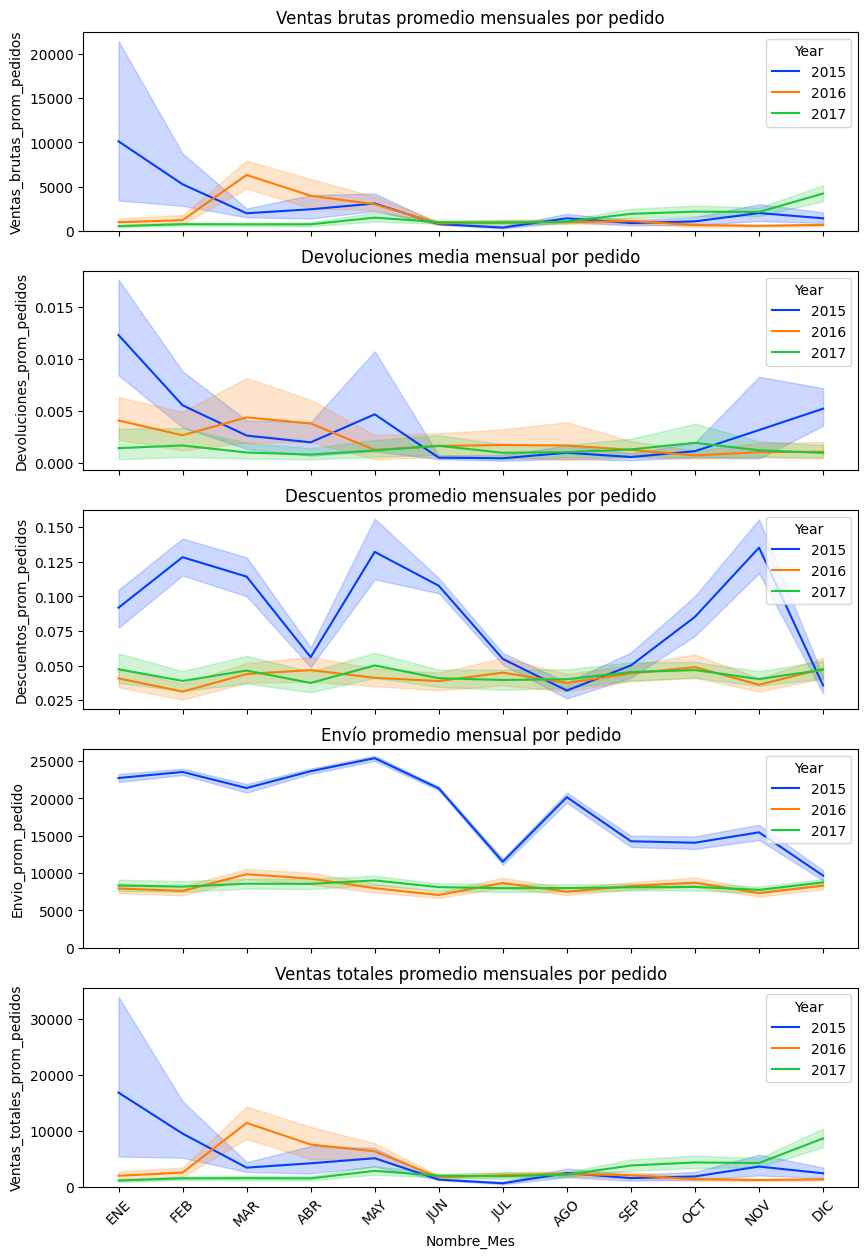

In [ ]:
# Grafico por Variables
# ==============================================================================
fig, ax = plt.subplots(5,1, figsize = (10,15), sharex = "all")
sns.lineplot(x = "Nombre_Mes", y = "Ventas_brutas_prom_pedidos", data = df, hue = "Year", ax = ax[0], palette = "bright", sort = False)
ax[0].set_title("Ventas brutas promedio mensuales por pedido")
ax[0].set_ylim(0)

sns.lineplot(x = "Nombre_Mes", y = "Devoluciones_prom_pedidos", data = df, hue = "Year", ax = ax[1], palette = "bright", sort = False)
ax[1].set_title("Devoluciones media mensual por pedido")

sns.lineplot(x = "Nombre_Mes", y = "Descuentos_prom_pedidos", data = df, hue = "Year", ax = ax[2], palette = "bright", sort = False)
ax[2].set_title("Descuentos promedio mensuales por pedido")

sns.lineplot(x = "Nombre_Mes", y = "Envio_prom_pedido", data = df, hue = "Year", ax = ax[3], palette = "bright", sort = False)
ax[3].set_title("Envío promedio mensual por pedido")
ax[3].set_ylim(0)

#sns.lineplot(x = "Nombre_Mes", y = "Prom_devoluciones_y_descuentos_pedidos", data = df, hue = "Year", ax = ax[2], palette = "bright", sort = False)
#ax[2].set_title("Devoluciones y descuentos promedio mensuales por pedido")
#ax[2].set_ylim(0)

sns.lineplot(x = "Nombre_Mes", y = "Ventas_totales_prom_pedidos", data = df, hue = "Year", ax = ax[4], palette = "bright", sort = False)
ax[4].set_title("Ventas totales promedio mensuales por pedido")
ax[4].set_ylim(0)

plt.xticks(rotation=45)
plt.show()

Como puede ver, el total de pedidos mensuales ha sido constante entre los años 2016 y 2017, muy superior al año 2015, con un promedio de alrededor de 6 a 8 pedidos por mes. Los pedidos totales comienzan a recuperarse a partir de Junio y alcanzan su punto máximo en Julio antes de volver a caer significativamente al nivel promedio en Agosto. Caso contrario no sucede con las ventas brutas y totales promedian entre 1000 y 1500 por mes antes de recuperarse en setiembre y alcanzar su punto máximo en octubre/noviembre/diciembre.

Sin embargo, en 2017 la tendencia ha cambiado un poco. Hay dos picos, uno en noviembre y otro en diciembre. En noviembre, las ventas brutas y totales son aproximadamente un 90 % más altas que las ventas promedio de 10 mil y en noviembre y diciembre, las ventas son aproximadamente un 100 % y un 130 % más altas que las ventas promedio de 15 mil.

El costo de envío promedio por pedido ha aumentado constantemente. En 2019, el costo de envío promedio está entre 15 y 20 en comparación con el costo de envío promedio de 10 a 15 en 2017. A pesar de eso, las devoluciones y el descuento promedio por pedido han aumentado y superan el aumento en el costo de envío. Eso explicaría por qué las ventas promedio por pedido estuvieron en su punto más bajo en 2019, especialmente en la segunda mitad de 2019. Las ventas promedio brutas y totales por pedido generalmente oscilan entre 75-125 y 100-150 respectivamente.

## **2. ¿Qué tipos de productos aportan el 80% de las ventas?**

In [ ]:
# Tipos de Productos que Apotan el 80% de las Ventas
# ==============================================================================

pivot_1 = df.groupby(["Familia"])[["Venta_Totales"]].agg("sum")
pivot_1["Proporcion de ventas"] = (pivot_1["Venta_Totales"]/pivot_1["Venta_Totales"].sum())
pivot_1.sort_values("Proporcion de ventas", ascending = False, inplace = True)
pivot_1["Proporcion de Ventas Acumuladas"] = pivot_1["Proporcion de ventas"].cumsum().apply(lambda x: "%.2f" % round(100*x,2))

pivot_2 = df.groupby(["Familia"])[["Venta_Totales"]].agg("mean")
pivot_2["Venta_Totales"] = pivot_2["Venta_Totales"].apply(lambda x: "%.2f" % round(x,2))
pivot_2.rename(columns = {"Venta_Totales":"Ventas medias por pedido"}, inplace = True)

pivot_3 = df.groupby(["Familia"])[["Venta_Totales"]].agg("count")
pivot_3.rename(columns = {"Venta_Totales":"Nro. de Pedidos"}, inplace = True)

pivot_1 = pivot_1.join(pivot_2)
pivot_1 = pivot_1.join(pivot_3)
pivot_1

,Venta_Totales,Proporcion de ventas,Proporcion de Ventas Acumuladas,Ventas medias por pedido,Nro. de Pedidos
Familia,,,,,
Guitarra,34555224.27,0.200294,20.03,10609.53,3257
Bateria,20949146.67,0.121428,32.17,24359.47,860
Amplificador,17071453.57,0.098952,42.07,11871.66,1438
Piano,10376255.25,0.060144,48.08,29146.78,356
Controlador,9925855.54,0.057534,53.84,10548.20,941
...,...,...,...,...,...
Boquilla,6178.50,0.000036,99.99,617.85,10
Herramientas,5714.97,0.000033,99.99,272.14,21
Armonica,3640.52,0.000021,100.00,520.07,7


Las categorias de Guitarras, Batería, Amplificador y Controlador son los 4 principales tipos de productos (de 74) que contribuyen con más del 80% de sus ventas netas totales. Además, podemos ver que estos 4 tipos de productos también son algunos de los tipos de productos que generan más ventas por pedido.

Sin embargo, se desconoce si estos 4 tipos de productos son los mismos productos para cada uno de los 3 años. Además, debido a la falta de datos, no puedo determinar si estos 4 tipos de productos principales se deben al aumento de las ventas en noviembre y diciembre. Para ello, se necesita la marca de tiempo de las órdenes para mejorar el análisis.

Si estos 4 tipos de productos son los mismos durante todo el año, el vendedor debería centrar más esfuerzos en generar más pedidos y ventas para estos productos.

## **3. ¿Cuál es el volumen típico por pedido y por tipo de producto?**

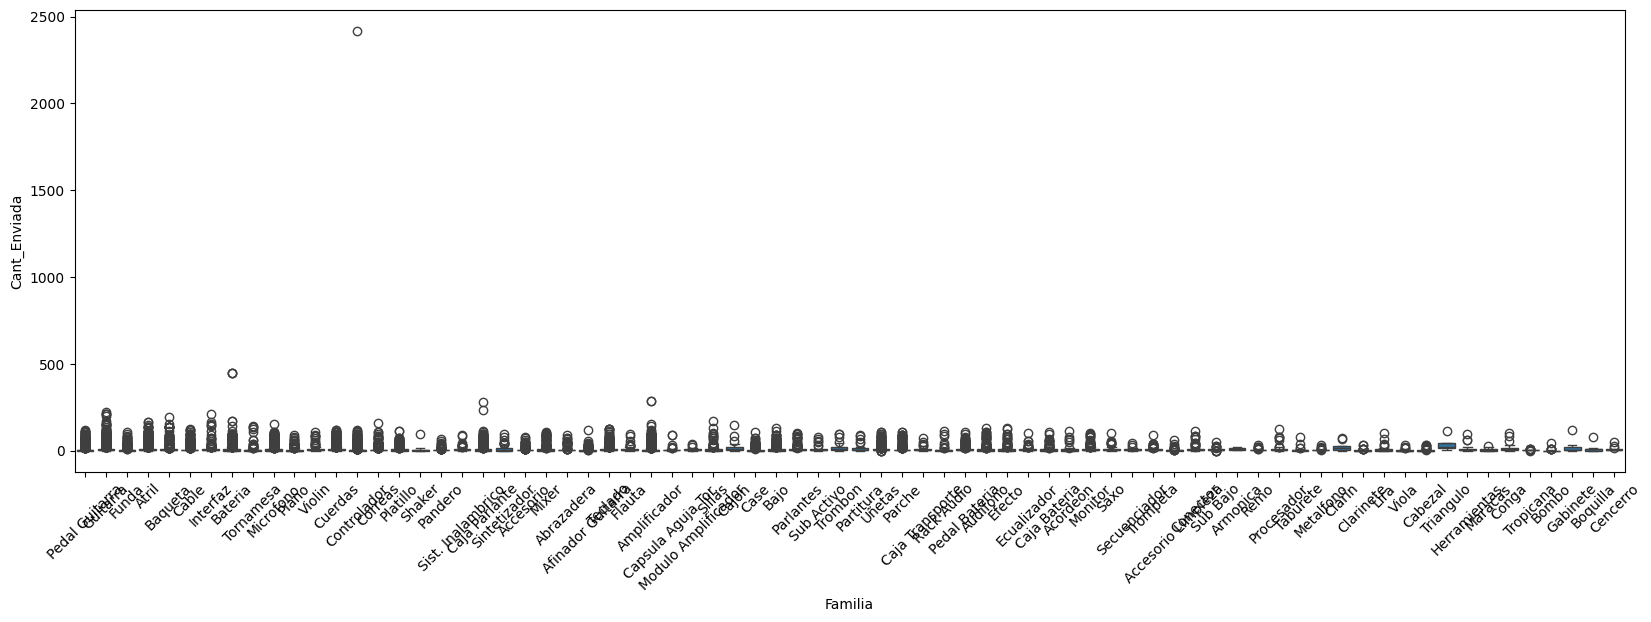

In [ ]:
# Volumen de Pedido por Familia
# ==============================================================================
plt.figure(figsize=(20, 6))
sns.boxplot(y = "Cant_Enviada", data = df, x = "Familia")
plt.xticks(rotation = 45)
plt.show()

Un diagrama de caja es una forma de visualizar la distribución de los datos. Aquí podemos observar que la mayor parte de la cantidad del pedido está bastante sesgada. Calcular la cantidad promedio por pedido para cada tipo de producto podría ser engañoso y llevar al vendedor a sobreestimar el inventario necesario para cada pedido. Por tanto, el uso de la mediana sería más apropiado.

In [ ]:
# Estadisticas Basicas por Tipo de Producto
# ==============================================================================

pivot_4 = df.groupby(["Familia"])[["Cant_Enviada"]].agg(["count","sum", "median", "mean"])
pivot_4[("Cant_Enviada", "mean")] = pivot_4[("Cant_Enviada", "mean")].apply(lambda x: int(x))

pivot_4

Cant_Enviada                  
                          count   sum median mean
Familia                                          
Abrazadera                  176  1663    5.0    9
Accesorio                   333  2256    3.0    6
Accesorio Limpieza          122   523    3.0    4
Acordeon                     63   644    4.0   10
Afinador Guitarra           193  1078    2.0    5
...                         ...   ...    ...  ...
Trompeta                    123  1000    4.0    8
Tropicana                    38   162    4.0    4
Uñetas                      624  6917    7.0   11
Viola                        40   195    2.0    4
Violin                       91  1399    6.0   15

[74 rows x 4 columns]

Según la tabla anterior, podemos observar que la cantidad para cada tipo de producto es bastante pequeña, con una cantidad típica entre 1 y 5 unidades. Aquí, podemos decir que el vendedor puede esperar que la mayoría de los pedidos sean en pequeñas cantidades, en las raras ocasiones en que se realiza un pedido al por mayor.

## **4. ¿Cuál es el rango de descuentos y devoluciones para cada tipo de producto?**

In [ ]:
# Creando las Variables
# ==============================================================================
df["Proporcion de Descuentos"] = (df["Descuento"].apply(lambda x: abs(x))/df["Ganancia"]).apply(lambda x: round(100*x, 2))
df["Proporcion de Devoluciones"] = (df["%Devolucion"].apply(lambda x: abs(x))/df["Ganancia"]).apply(lambda x: round(100*x, 2))


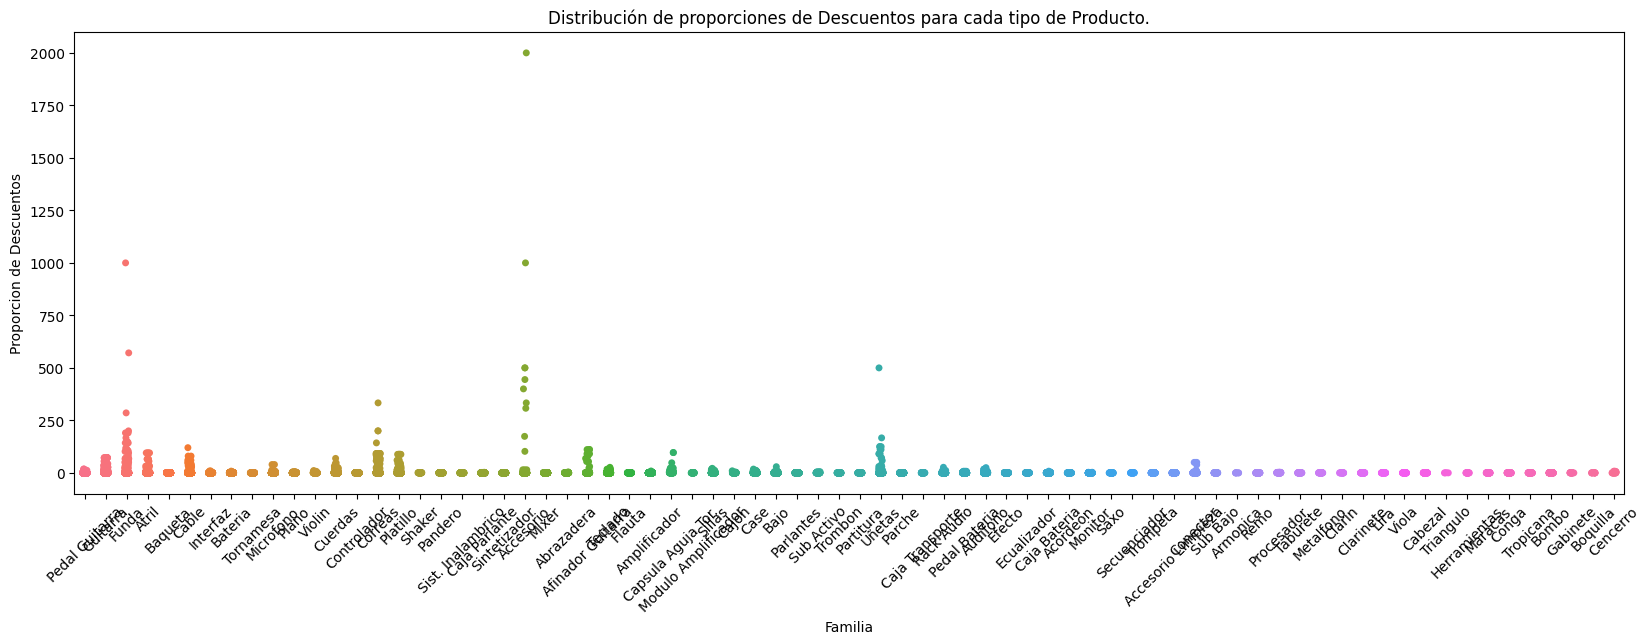

In [ ]:
# Grafico 1
# ==============================================================================
plt.figure(figsize=(20, 6))
sns.stripplot(x='Familia', y='Proporcion de Descuentos', data = df, jitter=True, hue='Familia')
plt.xticks(rotation = 45)
plt.title("Distribución de proporciones de Descuentos para cada tipo de Producto.")
plt.show()

Aquí podemos ver que los descuentos pueden llegar hasta el 15% y suelen estar entre el 0% y el 10%. La tasa de descuento la determina el vendedor, por lo que no hay mucho que estudiar aquí. Lo más importante a estudiar es la tasa de rentabilidad.

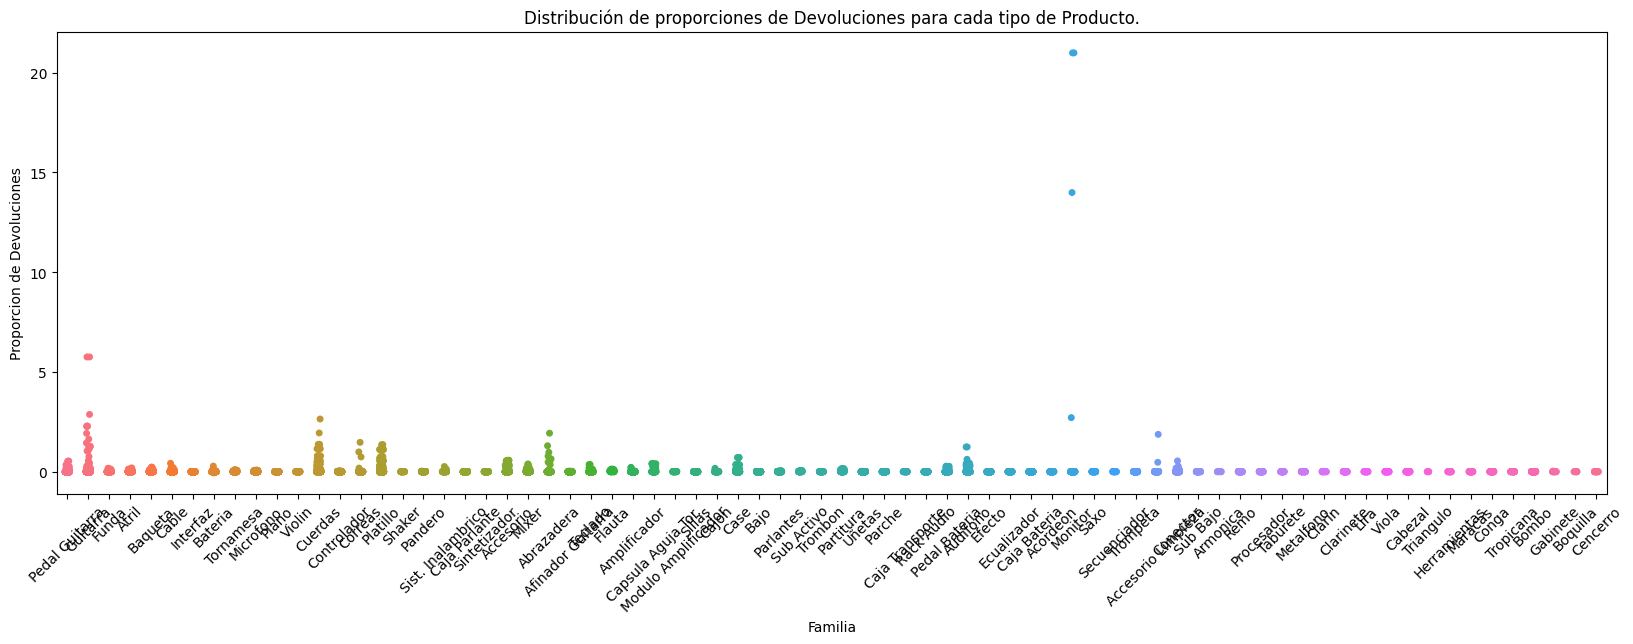

In [ ]:
# Grafico 2
# ==============================================================================
plt.figure(figsize=(20, 6))
sns.stripplot(x='Familia', y='Proporcion de Devoluciones', data = df, jitter=True, hue='Familia')
plt.xticks(rotation = 45)
plt.title("Distribución de proporciones de Devoluciones para cada tipo de Producto.")
plt.show()

Aquí podemos observar que la mayoría de los pedidos para la mayoría de los tipos de productos suelen ser del 0%. Sin embargo, los productos que se devuelven con frecuencia son Guitarras y Cuerdas. El resto de tipos de productos normalmente no se devuelven. El vendedor deberá analizar más a fondo estos pocos tipos de productos para identificar el motivo por el que se devuelven, especialmente los 4 productos principales que generan el 80% de las ventas netas totales.

## **5. ¿Existe una relación entre la tasa de descuento y la tasa de devolución?**

Estas relaciones se investigan en Guitarra, Bateria, Amplificador, Piano y Controlador, ya que estos productos tienen una alta tasa de rentabilidad.

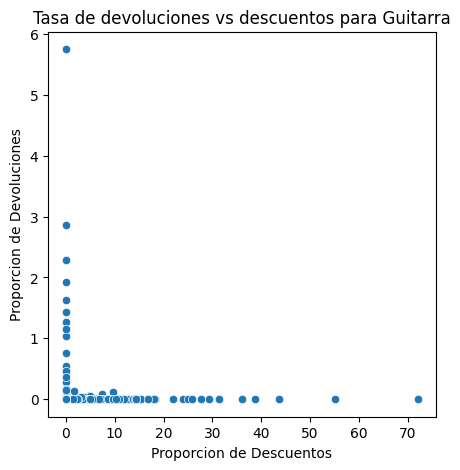

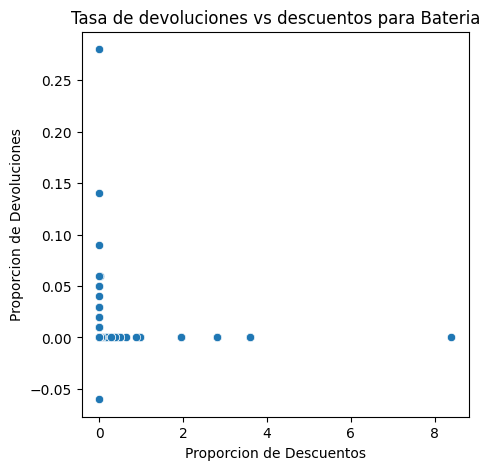

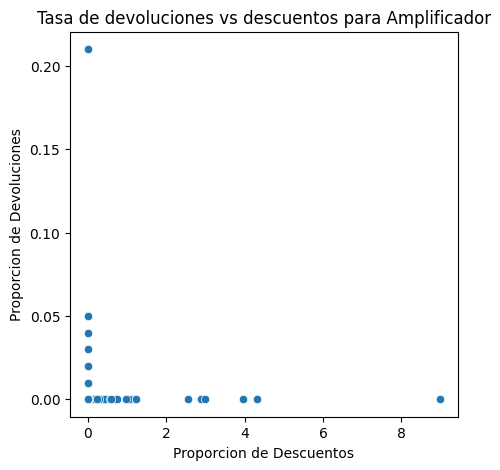

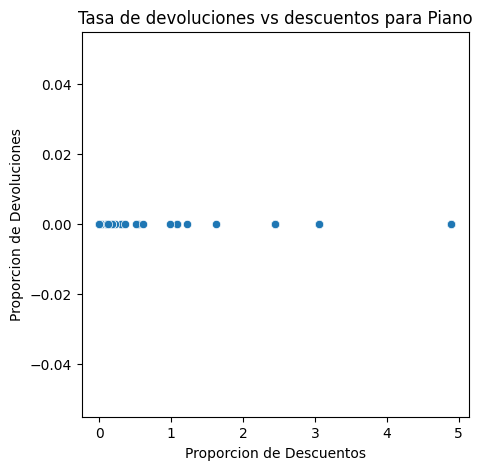

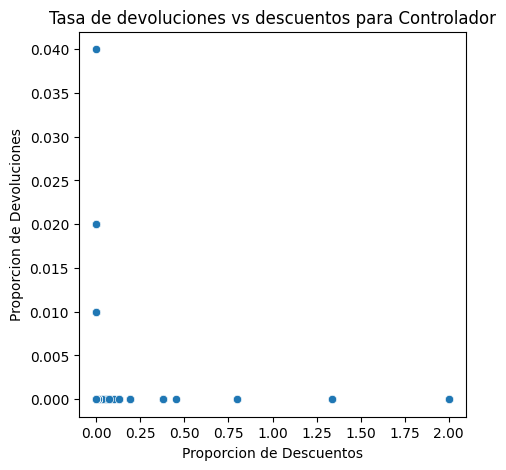

In [ ]:
# Descuentos vs Devoluciones
# ==============================================================================
tipo_producto = ["Guitarra", "Bateria", "Amplificador", "Piano","Controlador"]
for producto in tipo_producto:
    temp = df[df["Familia"] == producto]
    plt.figure(figsize = (5,5))
    sns.scatterplot(x = "Proporcion de Descuentos", y = "Proporcion de Devoluciones", data = temp)
    plt.title("Tasa de devoluciones vs descuentos para %s" %producto)
    plt.show()

No existe una relación obvia entre las devoluciones y la tasa de descuento para estos tipos de productos. Parece totalmente aleatorio y los rendimientos no dependen de la tasa de descuento. El vendedor deberá profundizar y observar mejor los artículos devueltos para identificar el motivo. Las ventas podrían ser mucho mayores si no se devuelven los productos.